In [1]:
import pandas as pd
import numpy as np
import warnings

# Suppress all runtime warnings (e.g., divide by zero, overflow)
warnings.filterwarnings("ignore", category=RuntimeWarning)
np.seterr(all='ignore')

cars_LinearRegression = pd.read_parquet("cars_ready_LinearRegression_small.parquet")
print("Price" in cars_LinearRegression.columns)
print(cars_LinearRegression.columns.tolist())


cars_DecisionTree = pd.read_parquet("cars_ready_DecisionTree_small.parquet")
print("Price" in cars_DecisionTree.columns)
print(cars_DecisionTree.columns.tolist())


cars_BART = pd.read_parquet("cars_ready_BART.parquet")
print("Price" in cars_BART.columns)
print(cars_BART.columns.tolist())

False
['Mileage', 'Log_Mileage', 'Age', 'Log_Age', 'Mileage_per_Year', 'Engine_Power', 'Engine_Capacity', 'Power_per_Liter', 'No_Accidents', 'Service_Record', 'Is_Imported', 'First_Owner', 'Professional_Seller', 'Make_Aixam', 'Make_Alfa Romeo', 'Make_Audi', 'Make_Baic', 'Make_Bentley', 'Make_Bmw', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Citroën', 'Make_Cupra', 'Make_Dacia', 'Make_Daihatsu', 'Make_Dodge', 'Make_Ds Automobiles', 'Make_Fiat', 'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Infiniti', 'Make_Isuzu', 'Make_Iveco', 'Make_Jaecoo', 'Make_Jaguar', 'Make_Jeep', 'Make_Kia', 'Make_Lamborghini', 'Make_Lancia', 'Make_Land Rover', 'Make_Lexus', 'Make_Maserati', 'Make_Mazda', 'Make_Mercedes-Benz', 'Make_Mg', 'Make_Mini', 'Make_Mitsubishi', 'Make_Nissan', 'Make_Opel', 'Make_Peugeot', 'Make_Porsche', 'Make_Ram', 'Make_Renault', 'Make_Saab', 'Make_Seat', 'Make_Skoda', 'Make_Smart', 'Make_Ssangyong/Kgm', 'Make_Subaru', 'Make_Suzuki', 'Make_Tesla', 'Make_Toyota', 'Make_Vo

In [9]:
print(cars_LinearRegression.shape)
print(cars_DecisionTree.shape)
print(cars_BART.shape)
print(cars_LinearRegression.columns.tolist())


(206545, 792)
(206545, 122)
(206545, 199)
['Mileage', 'Log_Mileage', 'Age', 'Log_Age', 'Mileage_per_Year', 'Engine_Power', 'Engine_Capacity', 'Power_per_Liter', 'No_Accidents', 'Service_Record', 'Is_Imported', 'First_Owner', 'Professional_Seller', 'Make_Aixam', 'Make_Alfa Romeo', 'Make_Audi', 'Make_Baic', 'Make_Bentley', 'Make_Bmw', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Citroën', 'Make_Cupra', 'Make_Dacia', 'Make_Daihatsu', 'Make_Dodge', 'Make_Ds Automobiles', 'Make_Fiat', 'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Infiniti', 'Make_Isuzu', 'Make_Iveco', 'Make_Jaecoo', 'Make_Jaguar', 'Make_Jeep', 'Make_Kia', 'Make_Lamborghini', 'Make_Lancia', 'Make_Land Rover', 'Make_Lexus', 'Make_Maserati', 'Make_Mazda', 'Make_Mercedes-Benz', 'Make_Mg', 'Make_Mini', 'Make_Mitsubishi', 'Make_Nissan', 'Make_Opel', 'Make_Peugeot', 'Make_Porsche', 'Make_Ram', 'Make_Renault', 'Make_Saab', 'Make_Seat', 'Make_Skoda', 'Make_Smart', 'Make_Ssangyong/Kgm', 'Make_Subaru', 'Make_Suzuki', '

In [2]:
import pandas as pd

# Sprawdzenie czy są jakiekolwiek NaN
if cars_DecisionTree.isna().any().any():
    print("❗ Zbiór zawiera wartości NaN w następujących kolumnach:\n")
    print(cars_DecisionTree.isna().sum()[cars_DecisionTree.isna().sum() > 0])
else:
    print("✅ Zbiór danych nie zawiera brakujących wartości (NaN).")

✅ Zbiór danych nie zawiera brakujących wartości (NaN).


In [12]:
pd.set_option('display.max_columns', None)
cars_LinearRegression.head()

,Mileage,Log_Mileage,Age,Log_Age,Mileage_per_Year,Engine_Power,Engine_Capacity,Power_per_Liter,No_Accidents,Service_Record,Is_Imported,First_Owner,Professional_Seller,Make_Aixam,Make_Alfa Romeo,Make_Audi,Make_Baic,Make_Bentley,Make_Bmw,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Citroën,Make_Cupra,Make_Dacia,Make_Daihatsu,Make_Dodge,Make_Ds Automobiles,Make_Fiat,Make_Ford,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Isuzu,Make_Iveco,Make_Jaecoo,Make_Jaguar,Make_Jeep,Make_Kia,Make_Lamborghini,Make_Lancia,Make_Land Rover,Make_Lexus,Make_Maserati,Make_Mazda,Make_Mercedes-Benz,Make_Mg,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Opel,Make_Peugeot,Make_Porsche,Make_Ram,Make_Renault,Make_Saab,Make_Seat,Make_Skoda,Make_Smart,Make_Ssangyong/Kgm,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_Model_Aixam City,Make_Model_Alfa Romeo 147,Make_Model_Alfa Romeo 159,Make_Model_Alfa Romeo Giulia,Make_Model_Alfa Romeo Giulietta,Make_Model_Alfa Romeo Gt,Make_Model_Alfa Romeo Mito,Make_Model_Alfa Romeo Stelvio,Make_Model_Alfa Romeo Tonale,Make_Model_Audi 80,Make_Model_Audi A1,Make_Model_Audi A2,Make_Model_Audi A3,Make_Model_Audi A4,Make_Model_Audi A4 Allroad,Make_Model_Audi A5,Make_Model_Audi A6,Make_Model_Audi A6 Allroad,Make_Model_Audi A7 Sportback,Make_Model_Audi A8,Make_Model_Audi E-Tron,Make_Model_Audi E-Tron Gt,Make_Model_Audi Q2,Make_Model_Audi Q3,Make_Model_Audi Q3 Sportback,Make_Model_Audi Q4 E-Tron,Make_Model_Audi Q5,Make_Model_Audi Q5 Sportback,Make_Model_Audi Q7,Make_Model_Audi Q8,Make_Model_Audi R8 Coupé,Make_Model_Audi Rs Q8,Make_Model_Audi Rs3 Sportback,Make_Model_Audi Rs4,Make_Model_Audi Rs5,Make_Model_Audi Rs6,Make_Model_Audi Rs7 Sportback,Make_Model_Audi S3,Make_Model_Audi S4,Make_Model_Audi S5,Make_Model_Audi S6,Make_Model_Audi S7 Sportback,Make_Model_Audi S8,Make_Model_Audi Sq5,Make_Model_Audi Sq7,Make_Model_Audi Sq8,Make_Model_Audi Tt Coupé,Make_Model_Audi Tt S Coupé,Make_Model_Baic Beijing 5,Make_Model_Bentley Continental Gt,Make_Model_Bentley Flying Spur,Make_Model_Bmw 3Gt,Make_Model_Bmw 5Gt,Make_Model_Bmw 6Gt,Make_Model_Bmw I3,Make_Model_Bmw I4,Make_Model_Bmw Ix,Make_Model_Bmw Ix1,Make_Model_Bmw M2,Make_Model_Bmw M3,Make_Model_Bmw M4,Make_Model_Bmw M5,Make_Model_Bmw M6,Make_Model_Bmw M8,Make_Model_Bmw Seria 1,Make_Model_Bmw Seria 2,Make_Model_Bmw Seria 3,Make_Model_Bmw Seria 4,Make_Model_Bmw Seria 5,Make_Model_Bmw Seria 6,Make_Model_Bmw Seria 7,Make_Model_Bmw Seria 8,Make_Model_Bmw X1,Make_Model_Bmw X2,Make_Model_Bmw X3,Make_Model_Bmw X3 M,Make_Model_Bmw X4,Make_Model_Bmw X4 M,Make_Model_Bmw X5,Make_Model_Bmw X5 M,Make_Model_Bmw X6,Make_Model_Bmw X6M,Make_Model_Bmw X7,Make_Model_Bmw Z3,Make_Model_Bmw Z4,Make_Model_Cadillac Escalade,Make_Model_Chevrolet Aveo,Make_Model_Chevrolet Camaro,Make_Model_Chevrolet Captiva,Make_Model_Chevrolet Corvette,Make_Model_Chevrolet Cruze,Make_Model_Chevrolet Orlando,Make_Model_Chevrolet Spark,Make_Model_Chevrolet Trax,Make_Model_Chrysler 300C,Make_Model_Chrysler Grand Voyager,Make_Model_Chrysler Pacifica,Make_Model_Chrysler Town & Country,Make_Model_Citroën Berlingo,Make_Model_Citroën C-Crosser,Make_Model_Citroën C-Elysée,Make_Model_Citroën C1,Make_Model_Citroën C2,Make_Model_Citroën C3,Make_Model_Citroën C3 Aircross,Make_Model_Citroën C3 Picasso,Make_Model_Citroën C4,Make_Model_Citroën C4 Aircross,Make_Model_Citroën C4 Cactus,Make_Model_Citroën C4 Grand Picasso,Make_Model_Citroën C4 Picasso,Make_Model_Citroën C4 Spacetourer,Make_Model_Citroën C4X,Make_Model_Citroën C5,Make_Model_Citroën C5 Aircross,Make_Model_Citroën C5X,Make_Model_Citroën C8,Make_Model_Citroën Ds3,Make_Model_Citroën Ds4,Make_Model_Citroën Ds5,Make_Model_Citroën Jumper,Make_Model_Citroën Jumpy Combi,Make_Model_Citroën Spacetourer,Make_Model_Citroën Xsara Picasso,Make_Model_Cupra Ateca,Make_Model_Cupra Formentor,Make_Model_Cupra Leon,Make_Model_Cupra Leon Sportstourer,Make_Model_Cupra Terramar,Make_Model_Dacia Dokker,Make_Model_Dacia Duster,Make_Model_Dacia Jogger,Make_Model_Dacia Lodgy,Make_M


📊 Cross-validation and test set performance:
                  MAE_CV  RMSE_CV   R2_CV  MAE_Test  RMSE_Test  R2_Test
model                                                                  
LassoCV           0.1667   0.2497  0.9277    0.1656     0.2488   0.9279
LinearRegression  0.1668   0.2496  0.9278    0.1657     0.2488   0.9280
RidgeCV           0.1668   0.2496  0.9278    0.1657     0.2488   0.9280


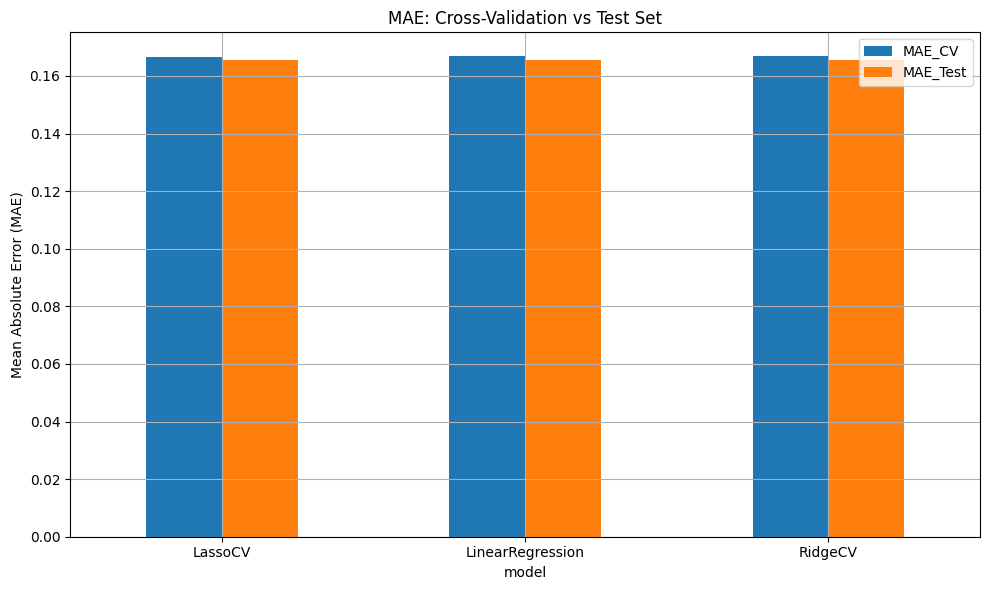

In [4]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# --- Ustawienia ---
warnings.filterwarnings("ignore", category=RuntimeWarning)
np.seterr(all='ignore')

# --- Dane ---
df = cars_LinearRegression.copy()

# --- Podział: train i test ---
train_df = df[df["cv_fold"] != -1].copy()
test_df = df[df["cv_fold"] == -1].copy()

X_train = train_df.drop(columns=["Log_Price", "cv_fold", "split"])
y_train = train_df["Log_Price"]
cv_fold = train_df["cv_fold"]

X_test = test_df.drop(columns=["Log_Price", "cv_fold", "split"])
y_test = test_df["Log_Price"]

# --- Usuwanie braków ---
mask_valid = X_train.notna().all(axis=1)
X_train = X_train[mask_valid]
y_train = y_train[mask_valid]
cv_fold = cv_fold[mask_valid]

# --- Standaryzacja ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Modele ---
alphas = np.logspace(-4, 1, 20)

models = {
    "LinearRegression": LinearRegression(n_jobs=-1),
    "RidgeCV": RidgeCV(alphas=alphas, cv=5),
    "LassoCV": LassoCV(alphas=alphas, cv=5, max_iter=5000, random_state=42)
}

# --- Cross-validation wyniki ---
cv_results = {"model": [], "fold": [], "MAE": [], "RMSE": [], "R2": []}
folds = sorted(cv_fold.unique())

for name, model in models.items():
    for fold in folds:
        train_idx = cv_fold != fold
        val_idx = cv_fold == fold

        X_fold_train = X_train_scaled[train_idx]
        X_fold_val = X_train_scaled[val_idx]
        y_fold_train = y_train.loc[train_idx]
        y_fold_val = y_train.loc[val_idx]

        model.fit(X_fold_train, y_fold_train)
        y_pred_val = model.predict(X_fold_val)

        cv_results["model"].append(name)
        cv_results["fold"].append(fold)
        cv_results["MAE"].append(mean_absolute_error(y_fold_val, y_pred_val))
        cv_results["RMSE"].append(np.sqrt(mean_squared_error(y_fold_val, y_pred_val)))
        cv_results["R2"].append(r2_score(y_fold_val, y_pred_val))

# --- Test-set wyniki ---
test_results = {"model": [], "MAE": [], "RMSE": [], "R2": []}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_test = model.predict(X_test_scaled)

    test_results["model"].append(name)
    test_results["MAE"].append(mean_absolute_error(y_test, y_pred_test))
    test_results["RMSE"].append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    test_results["R2"].append(r2_score(y_test, y_pred_test))

# --- Podsumowanie ---
cv_df = pd.DataFrame(cv_results)
cv_summary = cv_df.groupby("model").agg(
    MAE_CV=("MAE", "mean"),
    RMSE_CV=("RMSE", "mean"),
    R2_CV=("R2", "mean")
).round(4)

test_df = pd.DataFrame(test_results).set_index("model").round(4)
test_df.columns = ["MAE_Test", "RMSE_Test", "R2_Test"]

final_summary = pd.concat([cv_summary, test_df], axis=1)
print("\n📊 Cross-validation and test set performance:")
print(final_summary)

# --- Wykres MAE ---
final_summary[["MAE_CV", "MAE_Test"]].plot(kind="bar", figsize=(10, 6), title="MAE: Cross-Validation vs Test Set")
plt.ylabel("Mean Absolute Error (MAE)")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


🔎 LinearRegression: Top coefficients


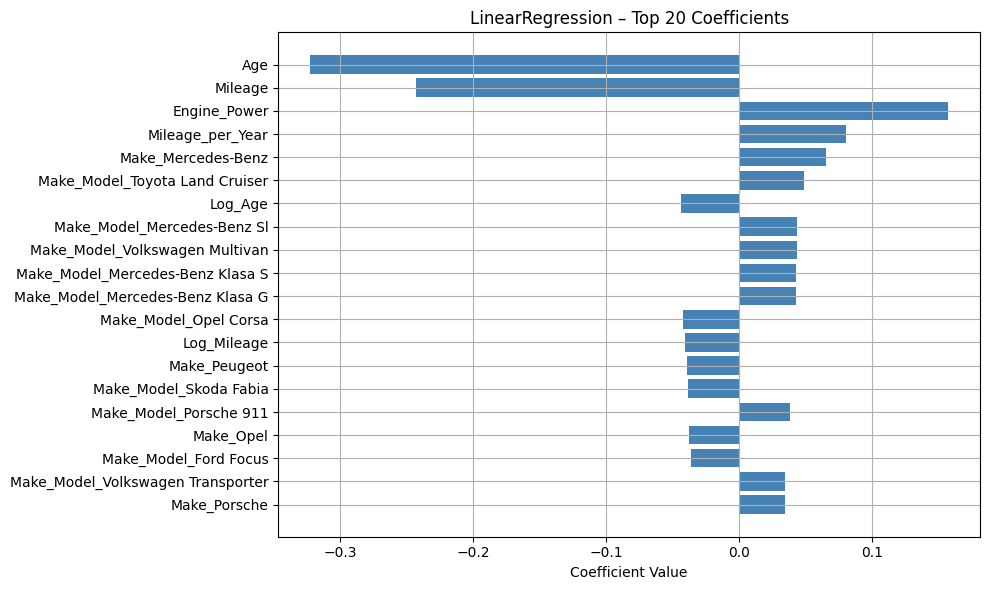


🔎 RidgeCV: Top coefficients


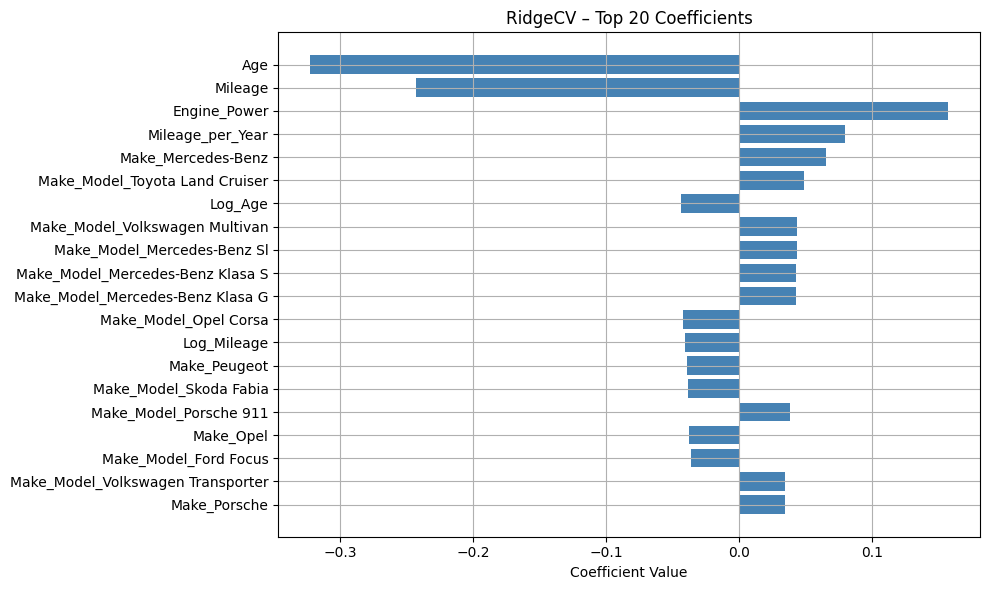


🔎 LassoCV: Top coefficients


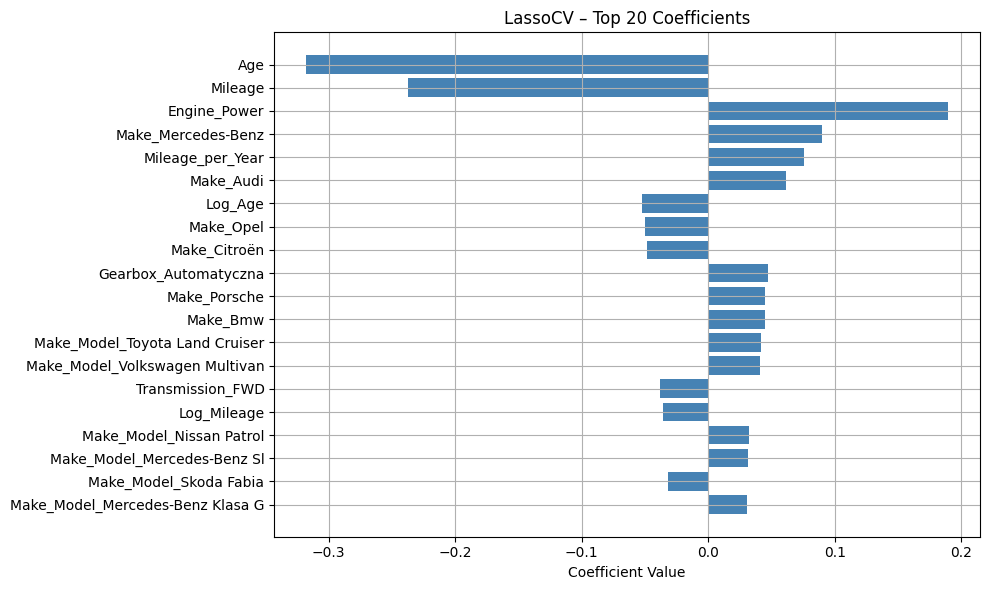

In [5]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
import matplotlib.pyplot as plt
import pandas as pd

# --- Funkcja do rysowania współczynników ---
def plot_top_coefficients(model, feature_names, top_n=20, title="Top Coefficients"):
    coefs = model.coef_
    coef_df = pd.DataFrame({
        "feature": feature_names,
        "coefficient": coefs
    })
    coef_df["abs_coef"] = coef_df["coefficient"].abs()
    top = coef_df.sort_values("abs_coef", ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    plt.barh(top["feature"], top["coefficient"], color='steelblue')
    plt.title(title)
    plt.xlabel("Coefficient Value")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Nazwy cech ---
feature_names = X_train.columns.tolist()

# --- Trening modeli na pełnym zbiorze treningowym ---
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

fitted_models = {
    "LinearRegression": LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train),
    "RidgeCV": RidgeCV(alphas=alphas, cv=5).fit(X_train_scaled, y_train),
    "LassoCV": LassoCV(alphas=alphas, cv=5, max_iter=5000, random_state=42).fit(X_train_scaled, y_train)
}

# --- Wykresy współczynników dla każdego modelu ---
for name, model in fitted_models.items():
    print(f"\n🔎 {name}: Top coefficients")
    plot_top_coefficients(model, feature_names, top_n=20, title=f"{name} – Top 20 Coefficients")